In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
# GLOBAL PARAMs
fs = 48000. # sampling freq

In [4]:
# LOAD RIRs

path_to_rirs_hdf = Path('deliverable/dEchorate_rirs.h5')
rir_dset = h5py.File(path_to_rirs_hdf, mode='r')

signals = list(rir_dset.keys())
print('Signals in this dataset:', signals)

rooms = list(rir_dset[signals[0]].keys())
print('Rooms in this dataset:', rooms)

sources = list(rir_dset[signals[0]][rooms[0]].keys())
print('Sources in this dataset:', sources)

print('RIR matrix shape', rir_dset[signals[0]][rooms[0]][sources[0]].shape)

Signals in this dataset: ['rir']
Rooms in this dataset: ['000000', '000001', '000010', '000100', '001000', '010000', '011000', '011100', '011110', '011111', '020002']
Sources in this dataset: ['0', '1', '2', '3', '4', '5', '6', '7', '8']
RIR matrix shape (24000, 31)


In [5]:
# LOAD ANNOTATIONs

path_to_echo_h5 = Path('deliverable/dEchorate_annotations.h5')
note_dset = h5py.File(path_to_echo_h5, 'r')
# let s check the content of this annotation dataset
for key in note_dset.keys():
    print(key)

arrays_direction
arrays_position
echo_amp
echo_toa
echo_wall
microphones
room_size
sources_directional_direction
sources_directional_position
sources_noise_direction
sources_noise_position
sources_omnidirection_position


(3, 4)
(3, 4)


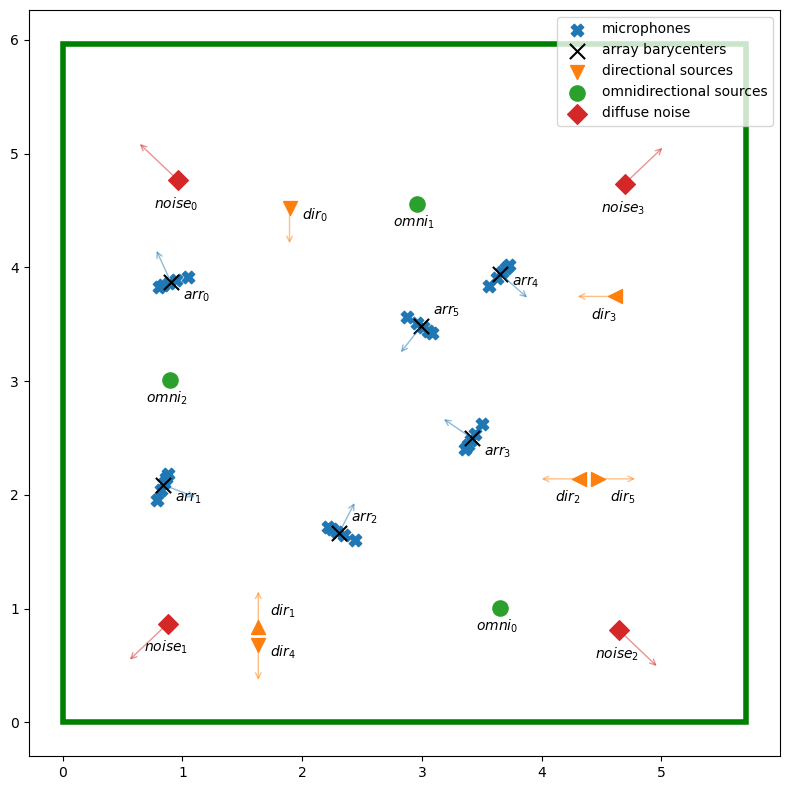

In [6]:
# DRAW GEOMETRY in 2D

room_size = note_dset['room_size'][()]
mics = note_dset['microphones'][()]
arrs = note_dset['arrays_position']
arrs_view = note_dset['arrays_direction']
srcs_dir = note_dset['sources_directional_position']
srcs_dir_view = note_dset['sources_directional_direction']
srcs_nse = note_dset['sources_noise_position']
srcs_nse_view = note_dset['sources_noise_direction']
srcs_omn = note_dset['sources_omnidirection_position']

m = { # marker type
    'arrs' : 'x',
    'mics' : 'X',
    'srcs_dir' : 'v',
    'srcs_omn' : 'o',
    'srcs_nse' : 'D',
}
s = { # marker size
    'arrs' : 120,
    'mics' : 80,
    'srcs_dir' : 100,
    'srcs_omn' : 120,
    'srcs_nse' : 100,
}
c = { # colors
    'arrs' : 'k',
    'mics' : 'C0',
    'srcs_dir' : 'C1',
    'srcs_omn' : 'C2',
    'srcs_nse' : 'C3',
}
l = { # labels
    'arrs' : 'array barycenters',
    'mics' : 'microphones',
    'srcs_dir' : 'directional sources',
    'srcs_omn' : 'omnidirectional sources',
    'srcs_nse' : 'diffuse noise',
}

plt.figure(figsize=(8,8))

# Plot ROOM
plt.gca().add_patch(
    plt.Rectangle((0, 0),
                room_size[0], room_size[1], fill=False,
                edgecolor='g', linewidth=4)
)

plt.scatter(mics[0, :], mics[1, :], marker=m['mics'], s=s['mics'], c=c['mics'], label=l['mics'])
plt.scatter(arrs[0, :], arrs[1, :], marker=m['arrs'], s=s['arrs'], c=c['arrs'], label=l['arrs'])

plt.text(arrs[0, 0]+0.1, arrs[1, 0]-0.15, '$arr_%d$' %0)
plt.text(arrs[0, 1]+0.1, arrs[1, 1]-0.15, '$arr_%d$' %1)
plt.text(arrs[0, 2]+0.1, arrs[1, 2]+0.10, '$arr_%d$' %2)
plt.text(arrs[0, 3]+0.1, arrs[1, 3]-0.15, '$arr_%d$' %3)
plt.text(arrs[0, 4]+0.1, arrs[1, 4]-0.1,  '$arr_%d$' %4)
plt.text(arrs[0, 5]+0.1, arrs[1, 5]+0.1,  '$arr_%d$' %5)

for a in range(arrs.shape[1]):
    x = arrs[0,a]
    y = arrs[1,a]
    dx = arrs_view[0,a] / 3
    dy = arrs_view[1,a] / 3
    plt.annotate("", xy=(x+dx,y+dy), xytext=(x, y), arrowprops=dict(arrowstyle="->", alpha=0.5, color=c['mics']))

# DIR
plt.scatter(srcs_dir[0, 0], srcs_dir[1, 0], marker='v', s=s['srcs_dir'], c=c['srcs_dir'], label=l['srcs_dir'])
plt.text(srcs_dir[0, 0]+0.1, srcs_dir[1, 0]-0.1, r'$dir_%d$' %0)
plt.text(srcs_dir[0, 1]+0.1, srcs_dir[1, 1]+0.1, r'$dir_%d$' %1)
plt.text(srcs_dir[0, 2]-0.2, srcs_dir[1, 2]-0.2, r'$dir_%d$' %2)
plt.text(srcs_dir[0, 3]-0.2, srcs_dir[1, 3]-0.2, r'$dir_%d$' %3)
plt.text(srcs_dir[0, 4]+0.1, srcs_dir[1, 4]-0.1, r'$dir_%d$' %4)
plt.text(srcs_dir[0, 5]+0.1, srcs_dir[1, 5]-0.2, r'$dir_%d$' %5)

for j in range(srcs_dir_view.shape[1]):
    x = srcs_dir[0,j]
    y = srcs_dir[1,j]
    dx = srcs_dir_view[0,j] / 3
    dy = srcs_dir_view[1,j] / 3
    plt.annotate("", xy=(x+dx,y+dy), xytext=(x, y), arrowprops=dict(arrowstyle="->", alpha=0.5, color=c['srcs_dir']))

# DIR
plt.scatter(srcs_dir[0, 1], srcs_dir[1, 1], marker='^', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 2], srcs_dir[1, 2], marker='<', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 3], srcs_dir[1, 3], marker='<', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 4], srcs_dir[1, 4], marker='v', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 5], srcs_dir[1, 5], marker='>', s=s['srcs_dir'], c=c['srcs_dir'])

# OMNI
plt.scatter(srcs_omn[0, :], srcs_omn[1, :], marker=m['srcs_omn'], s=s['srcs_omn'], c=c['srcs_omn'], label=l['srcs_omn'])
plt.text(srcs_omn[0, 0]-0.2, srcs_omn[1, 0]-0.2, r'$omni_%d$' %0)
plt.text(srcs_omn[0, 1]-0.2, srcs_omn[1, 1]-0.2, r'$omni_%d$' %1)
plt.text(srcs_omn[0, 2]-0.2, srcs_omn[1, 2]-0.2, r'$omni_%d$' %2)


# NOISE
plt.scatter(srcs_nse[0, :], srcs_nse[1, :], marker=m['srcs_nse'], s=s['srcs_nse'], c=c['srcs_nse'], label=l['srcs_nse'])
plt.text(srcs_nse[0, 0]-0.2, srcs_nse[1, 0]-0.25, r'$noise_%d$' %0)
plt.text(srcs_nse[0, 1]-0.2, srcs_nse[1, 1]-0.25, r'$noise_%d$' %1)
plt.text(srcs_nse[0, 2]-0.2, srcs_nse[1, 2]-0.25, r'$noise_%d$' %2)
plt.text(srcs_nse[0, 3]-0.2, srcs_nse[1, 3]-0.25, r'$noise_%d$' %3)
print(srcs_nse.shape)
print(srcs_nse_view.shape)
for j in range(srcs_nse_view.shape[1]):
    x = srcs_nse[0,j]
    y = srcs_nse[1,j]
    dx = srcs_nse_view[0,j] / 3
    dy = srcs_nse_view[1,j] / 3
    plt.annotate("", xy=(x+dx,y+dy), xytext=(x, y), arrowprops=dict(arrowstyle="->", alpha=0.5, color=c['srcs_nse']))


plt.legend()
plt.tight_layout()
plt.show()

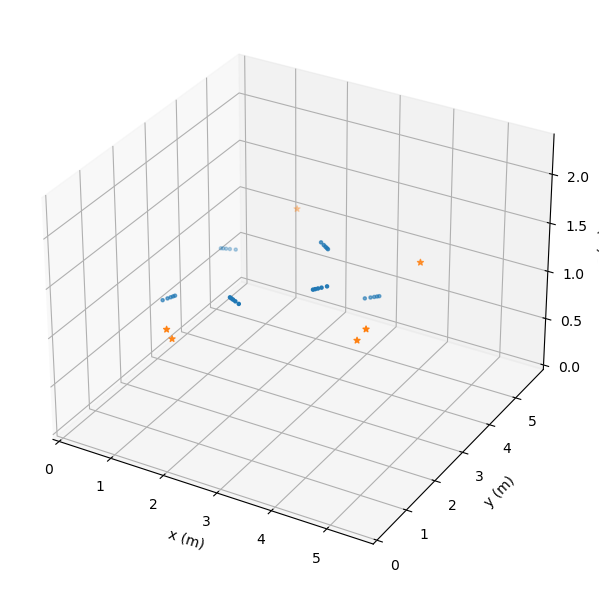

In [7]:
# DRAW GEOMTRY IN 3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(mics[0,:], mics[1,:], mics[2,:], marker='.')
ax.scatter3D(srcs_dir[0,:], srcs_dir[1,:], srcs_dir[2,:], marker='*')
ax.set_xlim([0, room_size[0]])
ax.set_ylim([0, room_size[1]])
ax.set_zlim([0, room_size[2]])
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'RIR [Amplitube]')

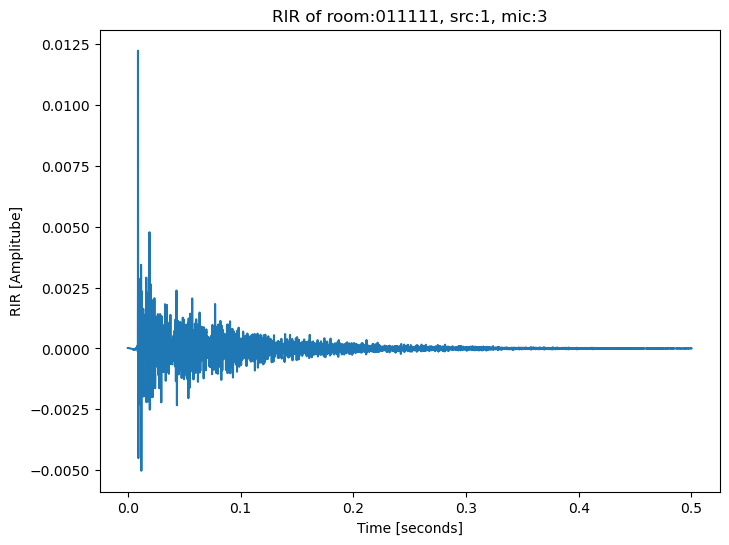

In [8]:
# Plot a RIR
signal = 'rir'
room = '011111'
src = 1
mic = 3
rir = rir_dset['rir']['011111'][str(src)][()][:,mic]

L = rir.shape[0]
time = np.arange(L)/fs

plt.figure(figsize=(8,6))
plt.title(f'RIR of room:{room}, src:{src}, mic:{mic}')
plt.plot(time, rir)
plt.xlabel('Time [seconds]')
plt.ylabel('RIR [Amplitube]')

In [15]:
# PLOT RIR SKYLINEs
rirs = np.stack([rir_dset['rir']['011111'][s][()] for s in sources], axis=1)
print(rirs.shape)
n_smpl, n_srcs, n_mics = rirs.shape

rirs_skyline = np.abs(rirs).transpose([0,2,1]).reshape([n_smpl,n_srcs*n_mics])
print(rirs_skyline.shape)

plt.imshow(rirs_skyline, extent=[0, I*J, 0, L], aspect='auto')

# plot srcs boundaries
for j in range(J):
    plt.axvline(j*I, color='C7')


(24000, 9, 31)
(24000, 279)


/rir/000000/0
/rir/000000/1
/rir/000000/2
/rir/000000/3
/rir/000000/4
/rir/000000/5
/rir/000000/6
/rir/000000/7
/rir/000000/8


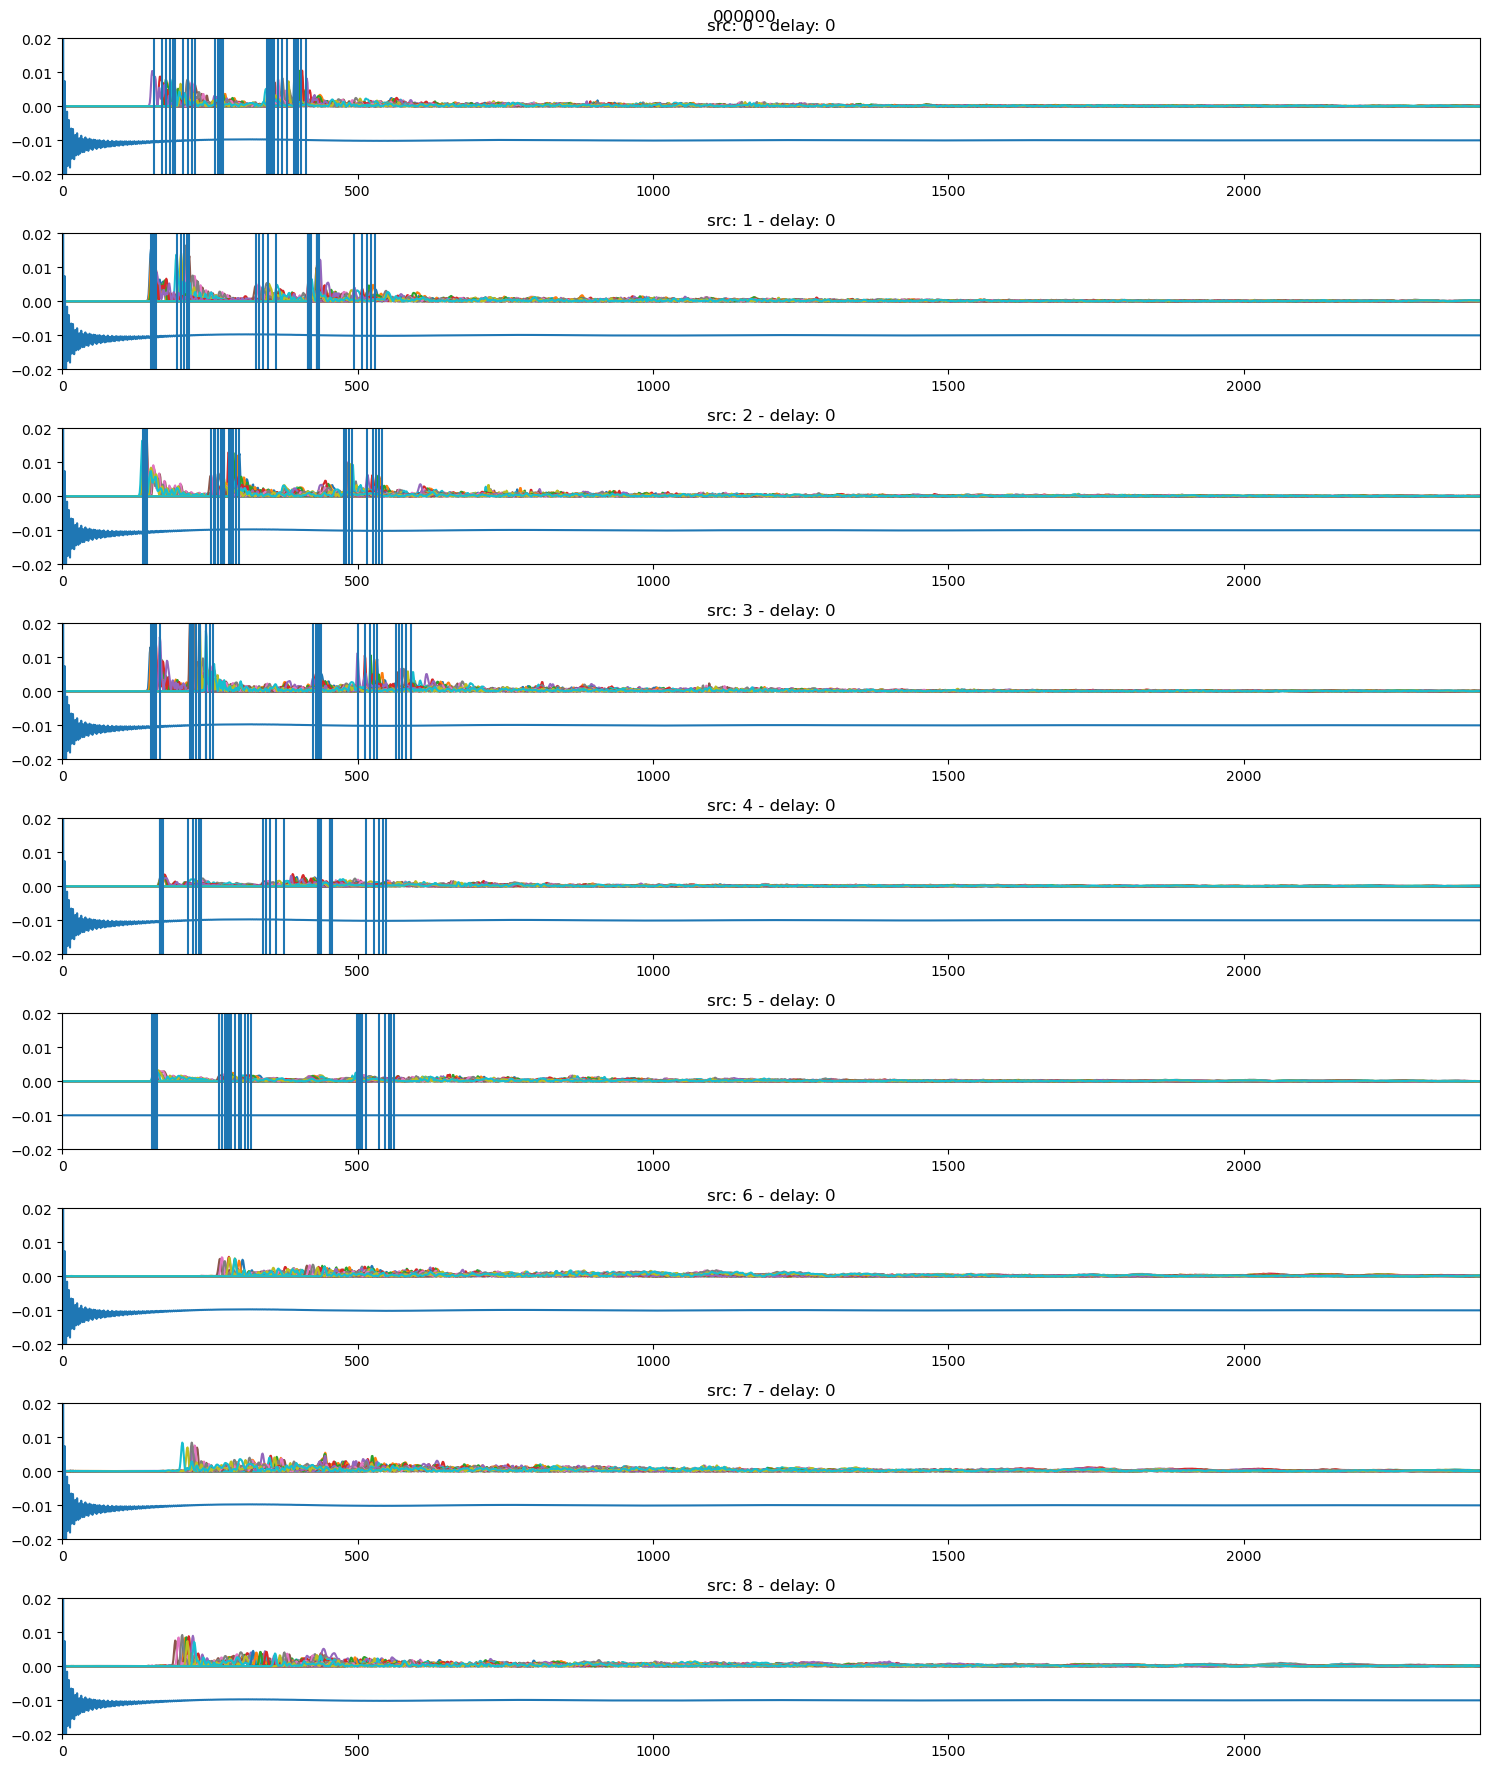

/rir/000001/0
/rir/000001/1
/rir/000001/2
/rir/000001/3
/rir/000001/4
/rir/000001/5
/rir/000001/6
/rir/000001/7
/rir/000001/8


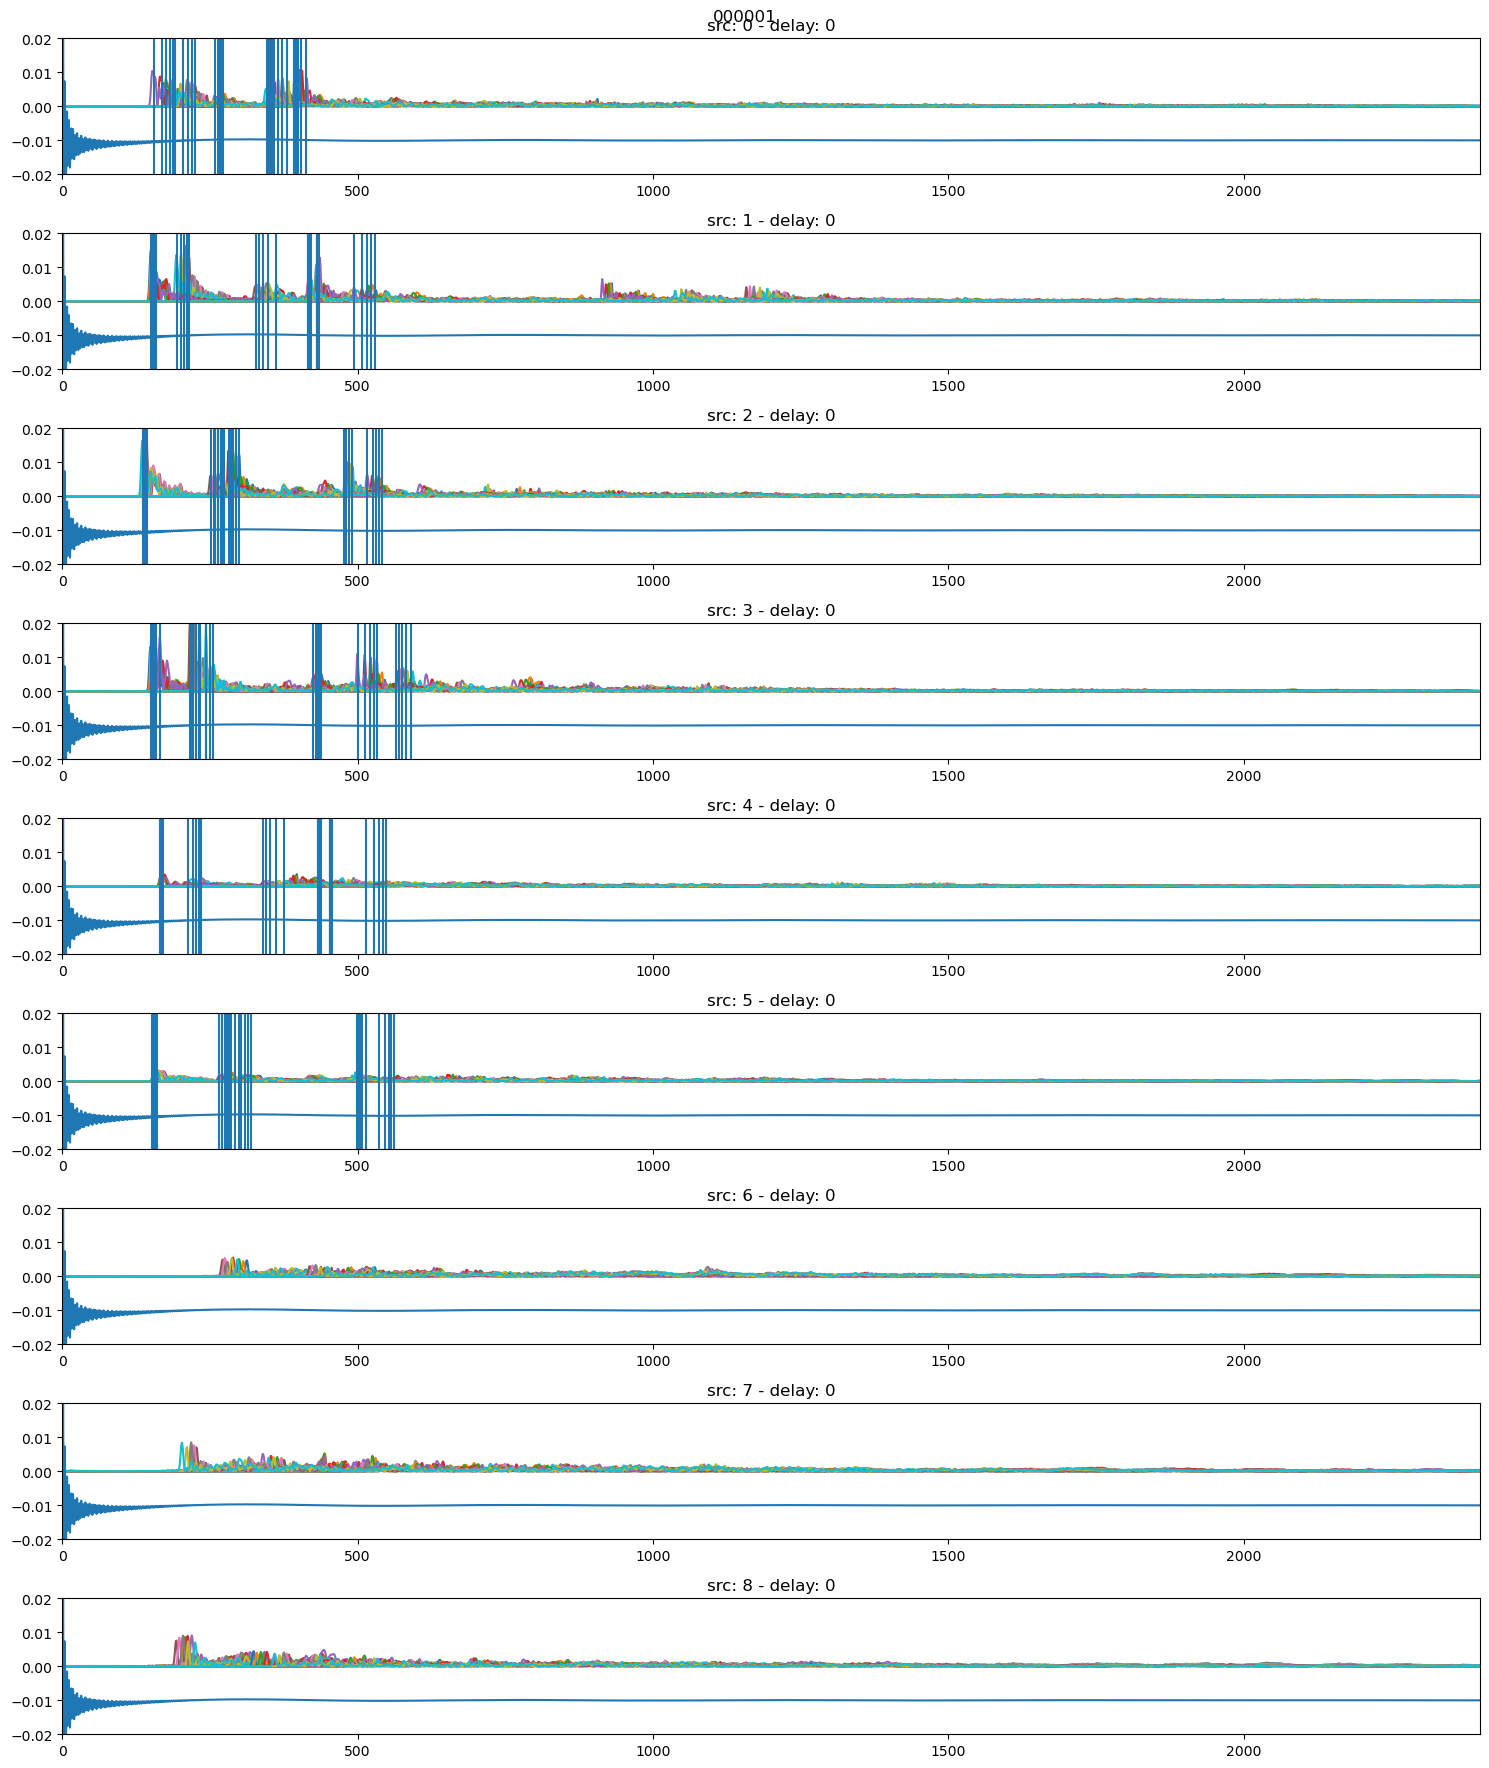

/rir/000010/0
/rir/000010/1
/rir/000010/2
/rir/000010/3
/rir/000010/4
/rir/000010/5
/rir/000010/6
/rir/000010/7
/rir/000010/8


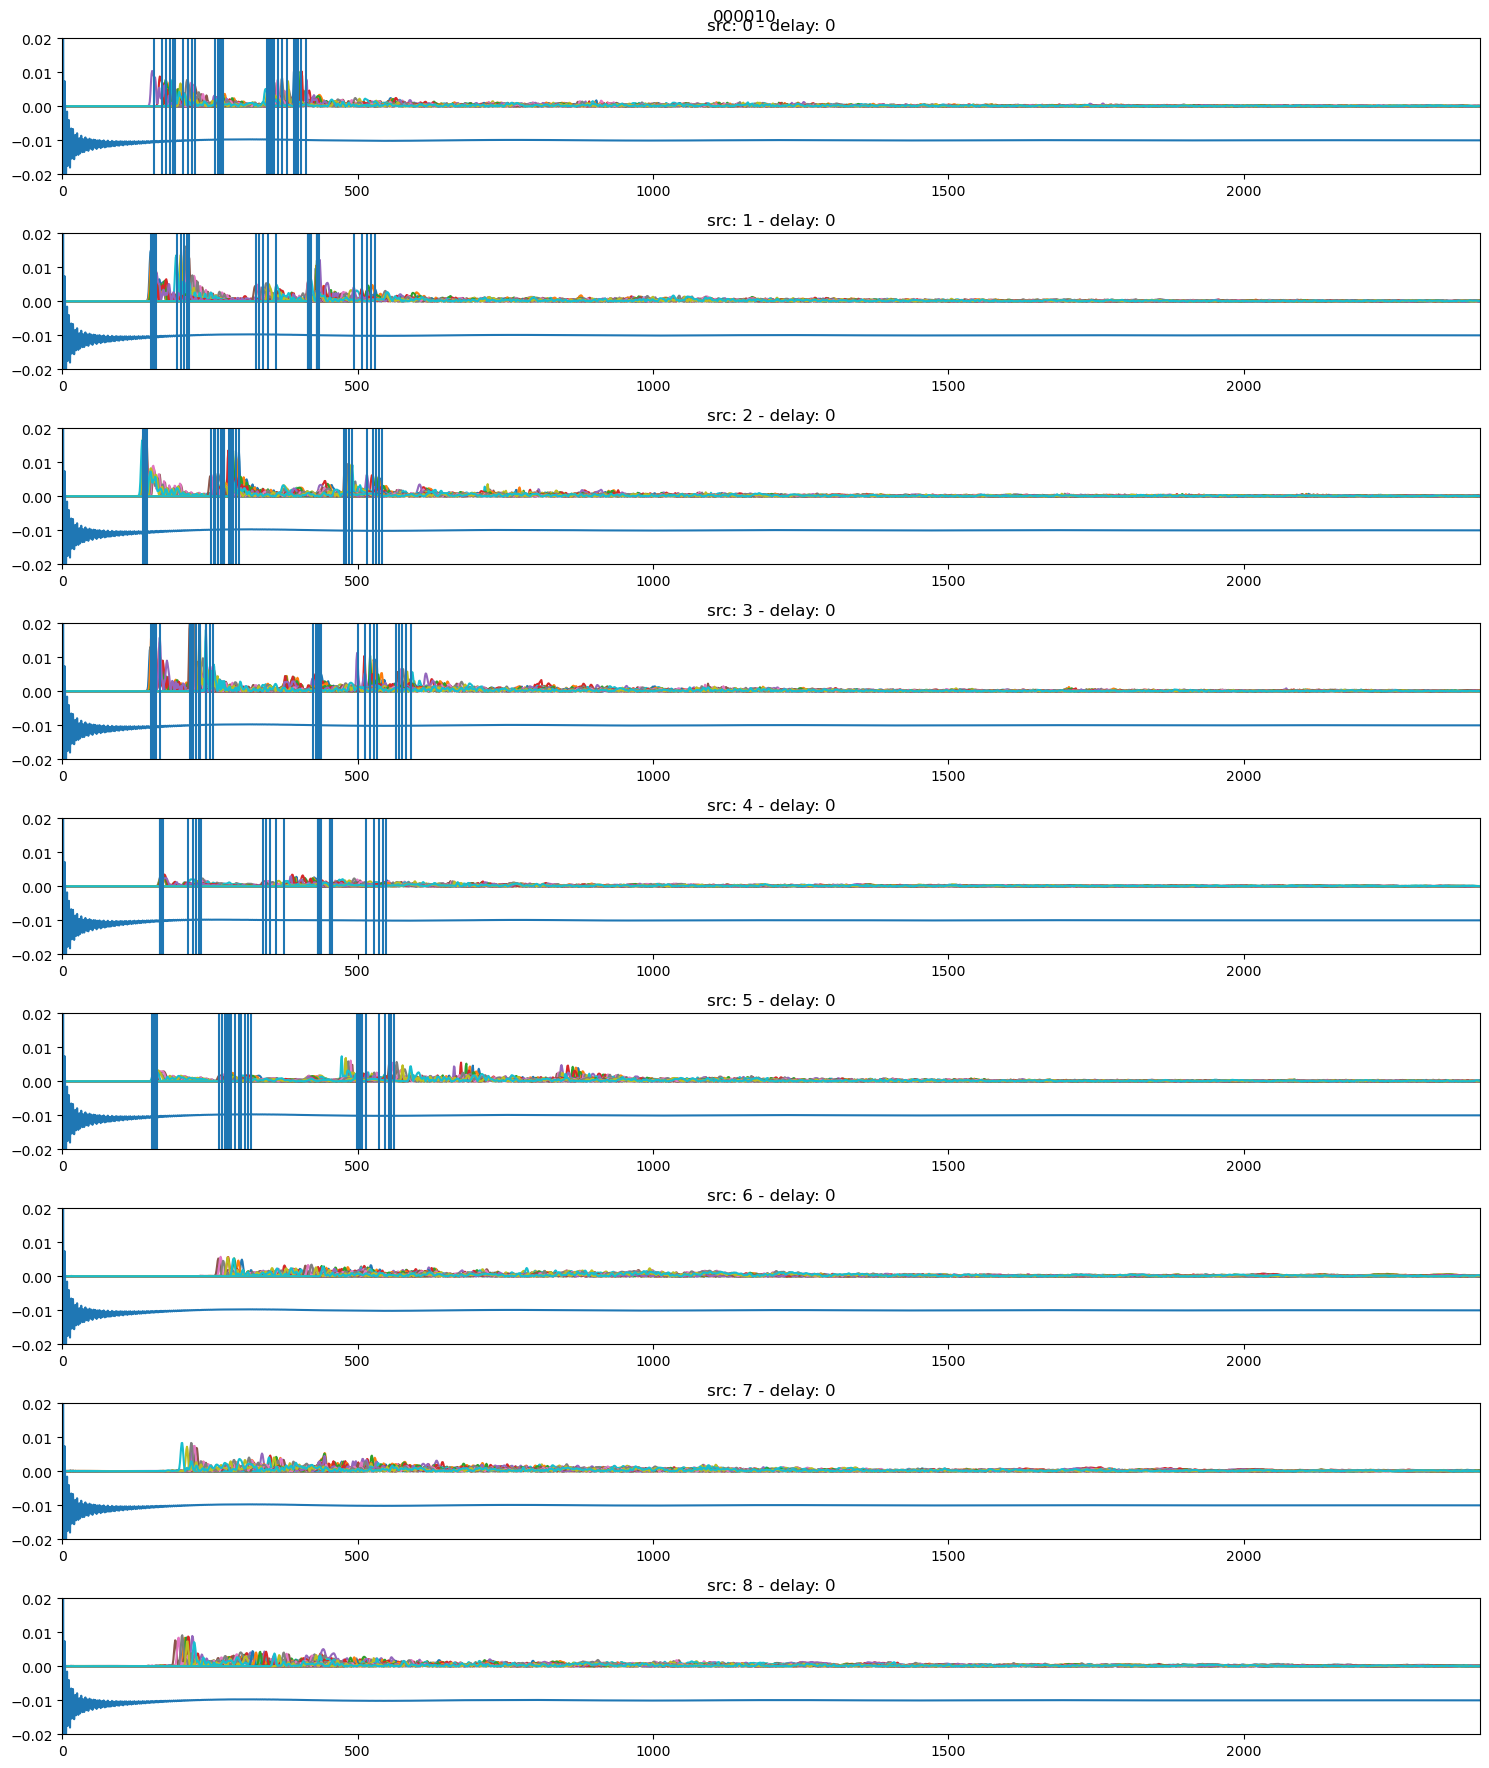

/rir/000100/0
/rir/000100/1
/rir/000100/2
/rir/000100/3
/rir/000100/4
/rir/000100/5
/rir/000100/6
/rir/000100/7
/rir/000100/8


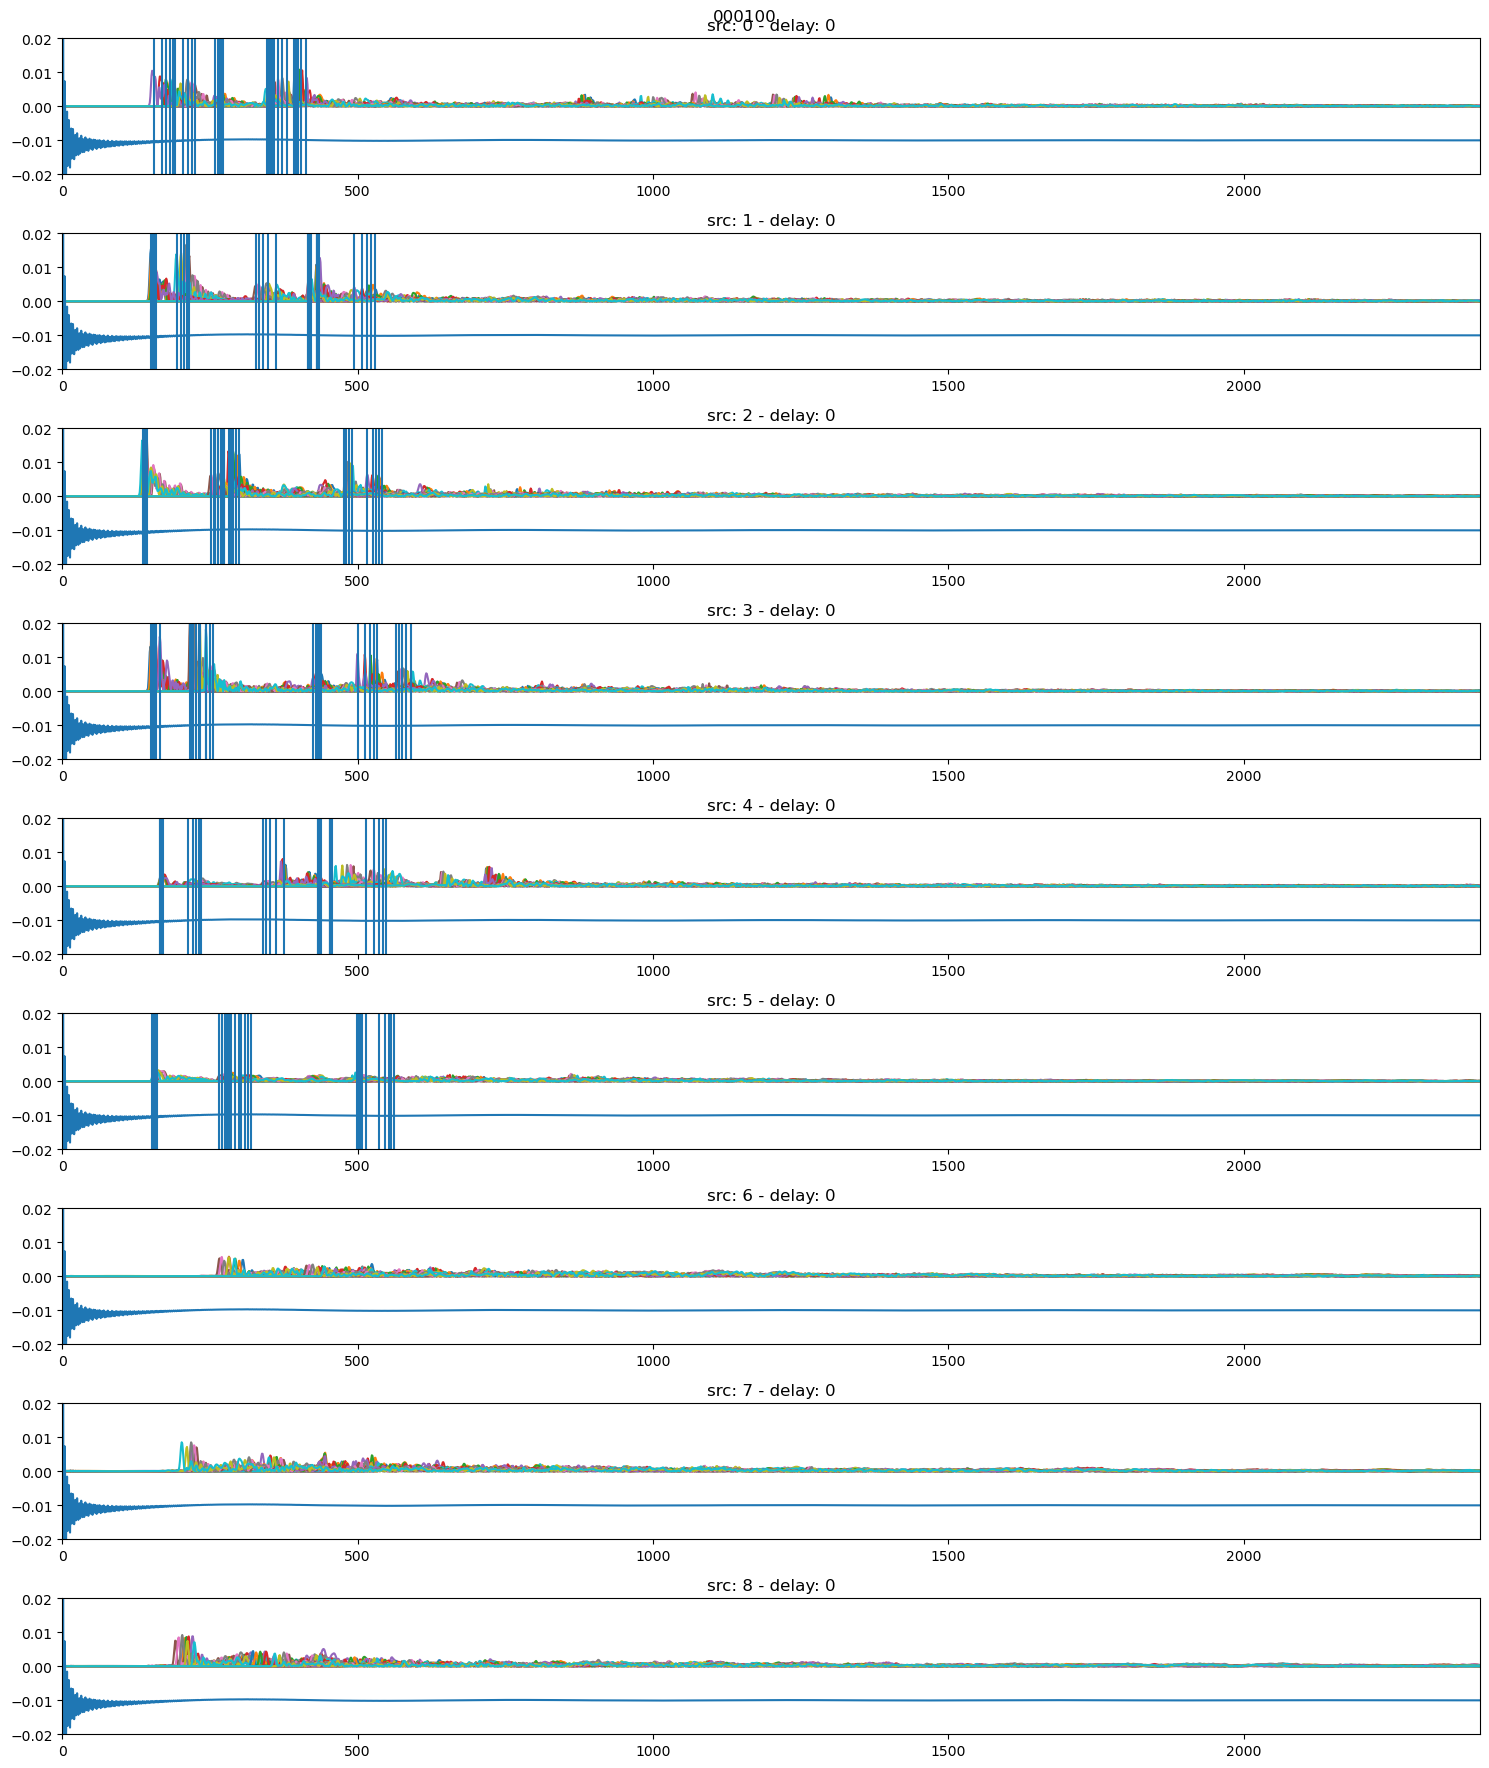

/rir/001000/0
/rir/001000/1
/rir/001000/2
/rir/001000/3
/rir/001000/4
/rir/001000/5
/rir/001000/6
/rir/001000/7
/rir/001000/8


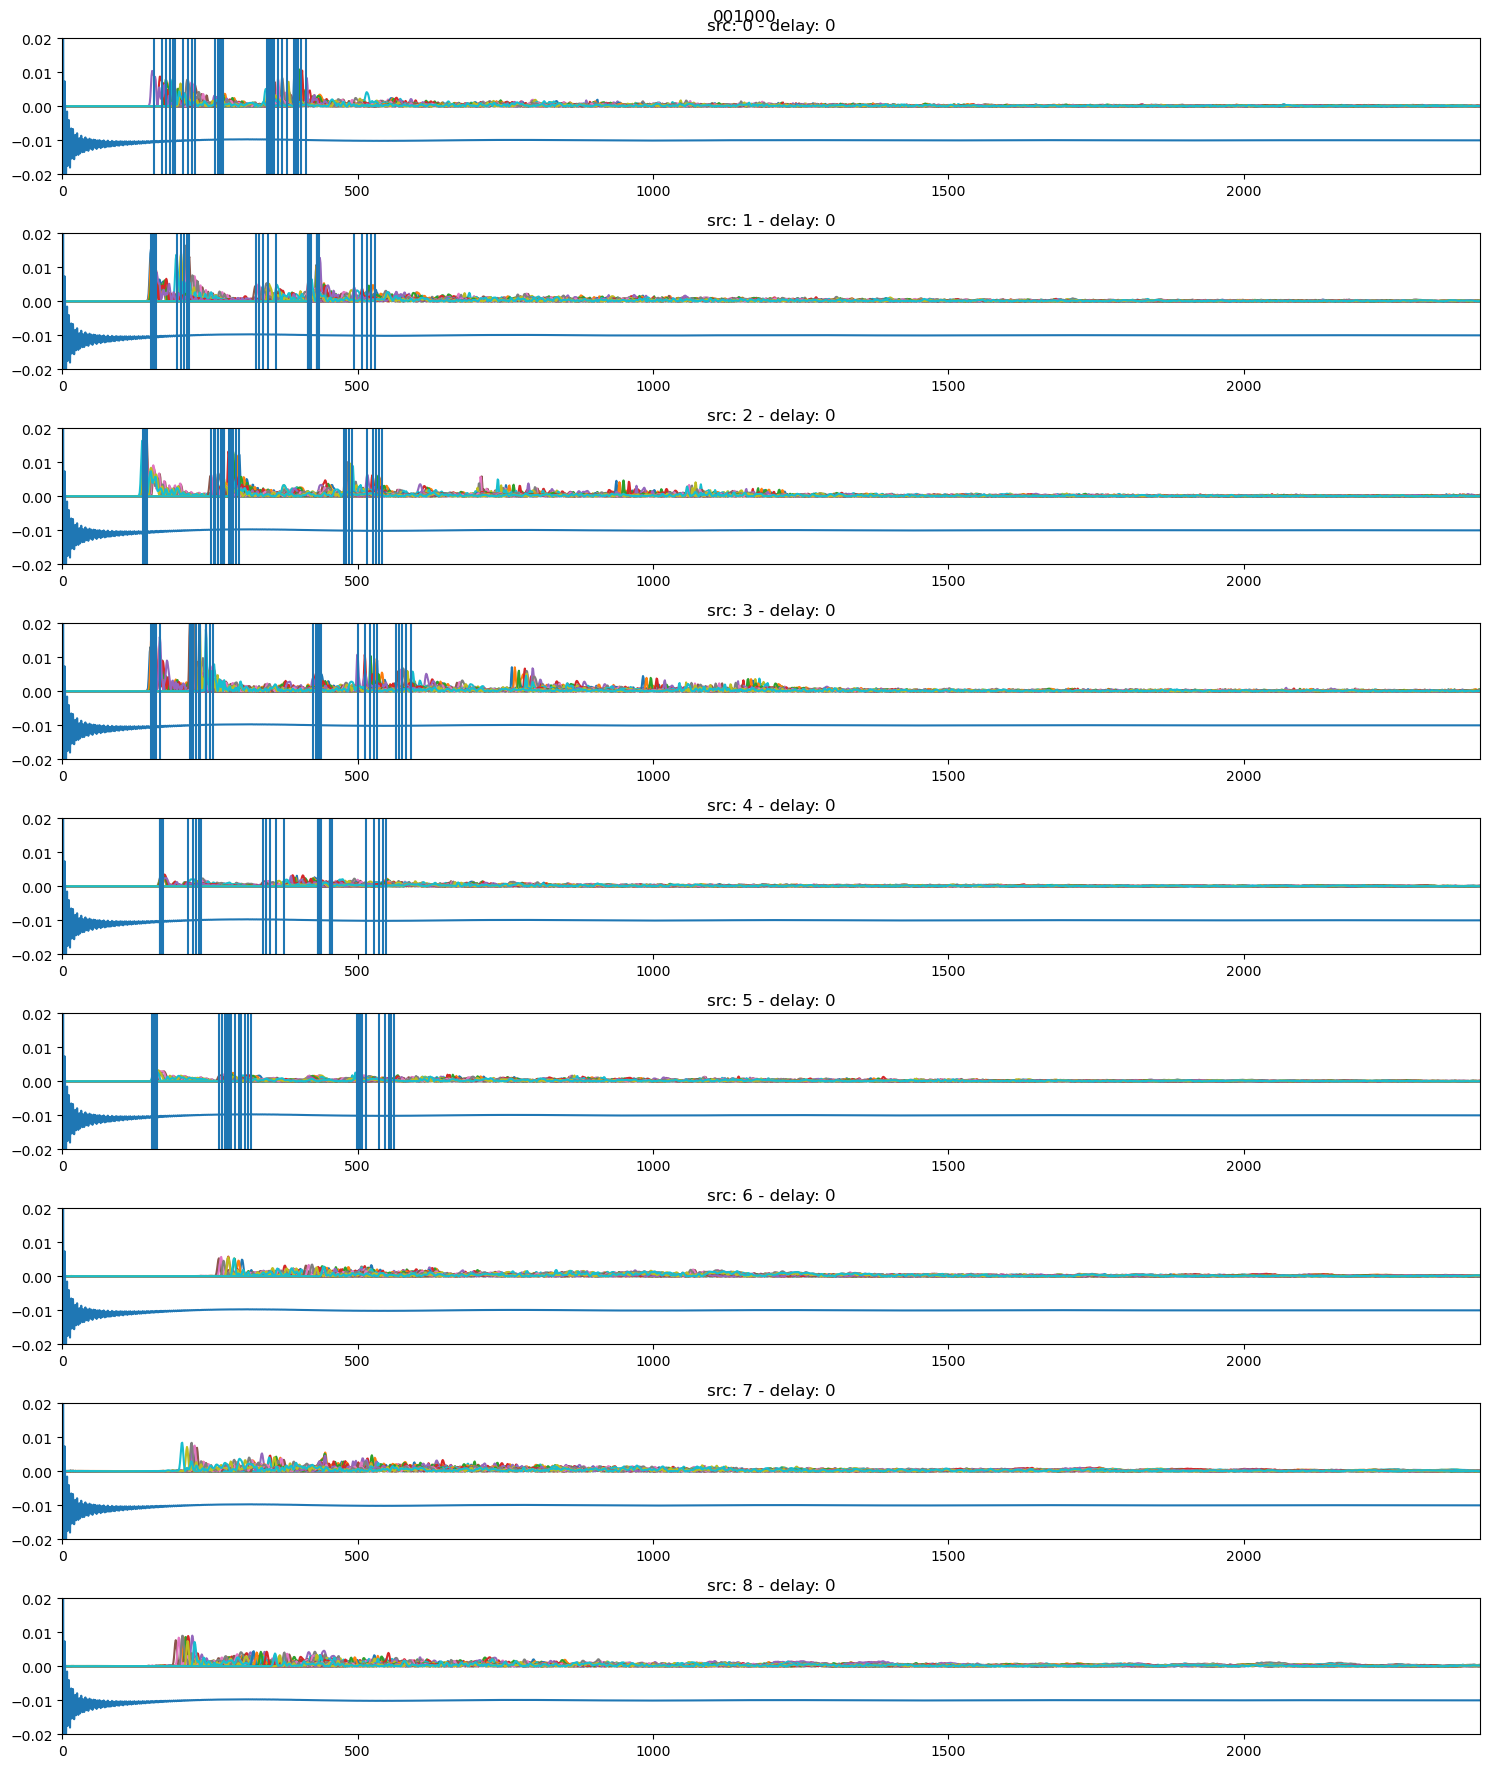

/rir/010000/0
/rir/010000/1
/rir/010000/2
/rir/010000/3
/rir/010000/4
/rir/010000/5
/rir/010000/6
/rir/010000/7
/rir/010000/8


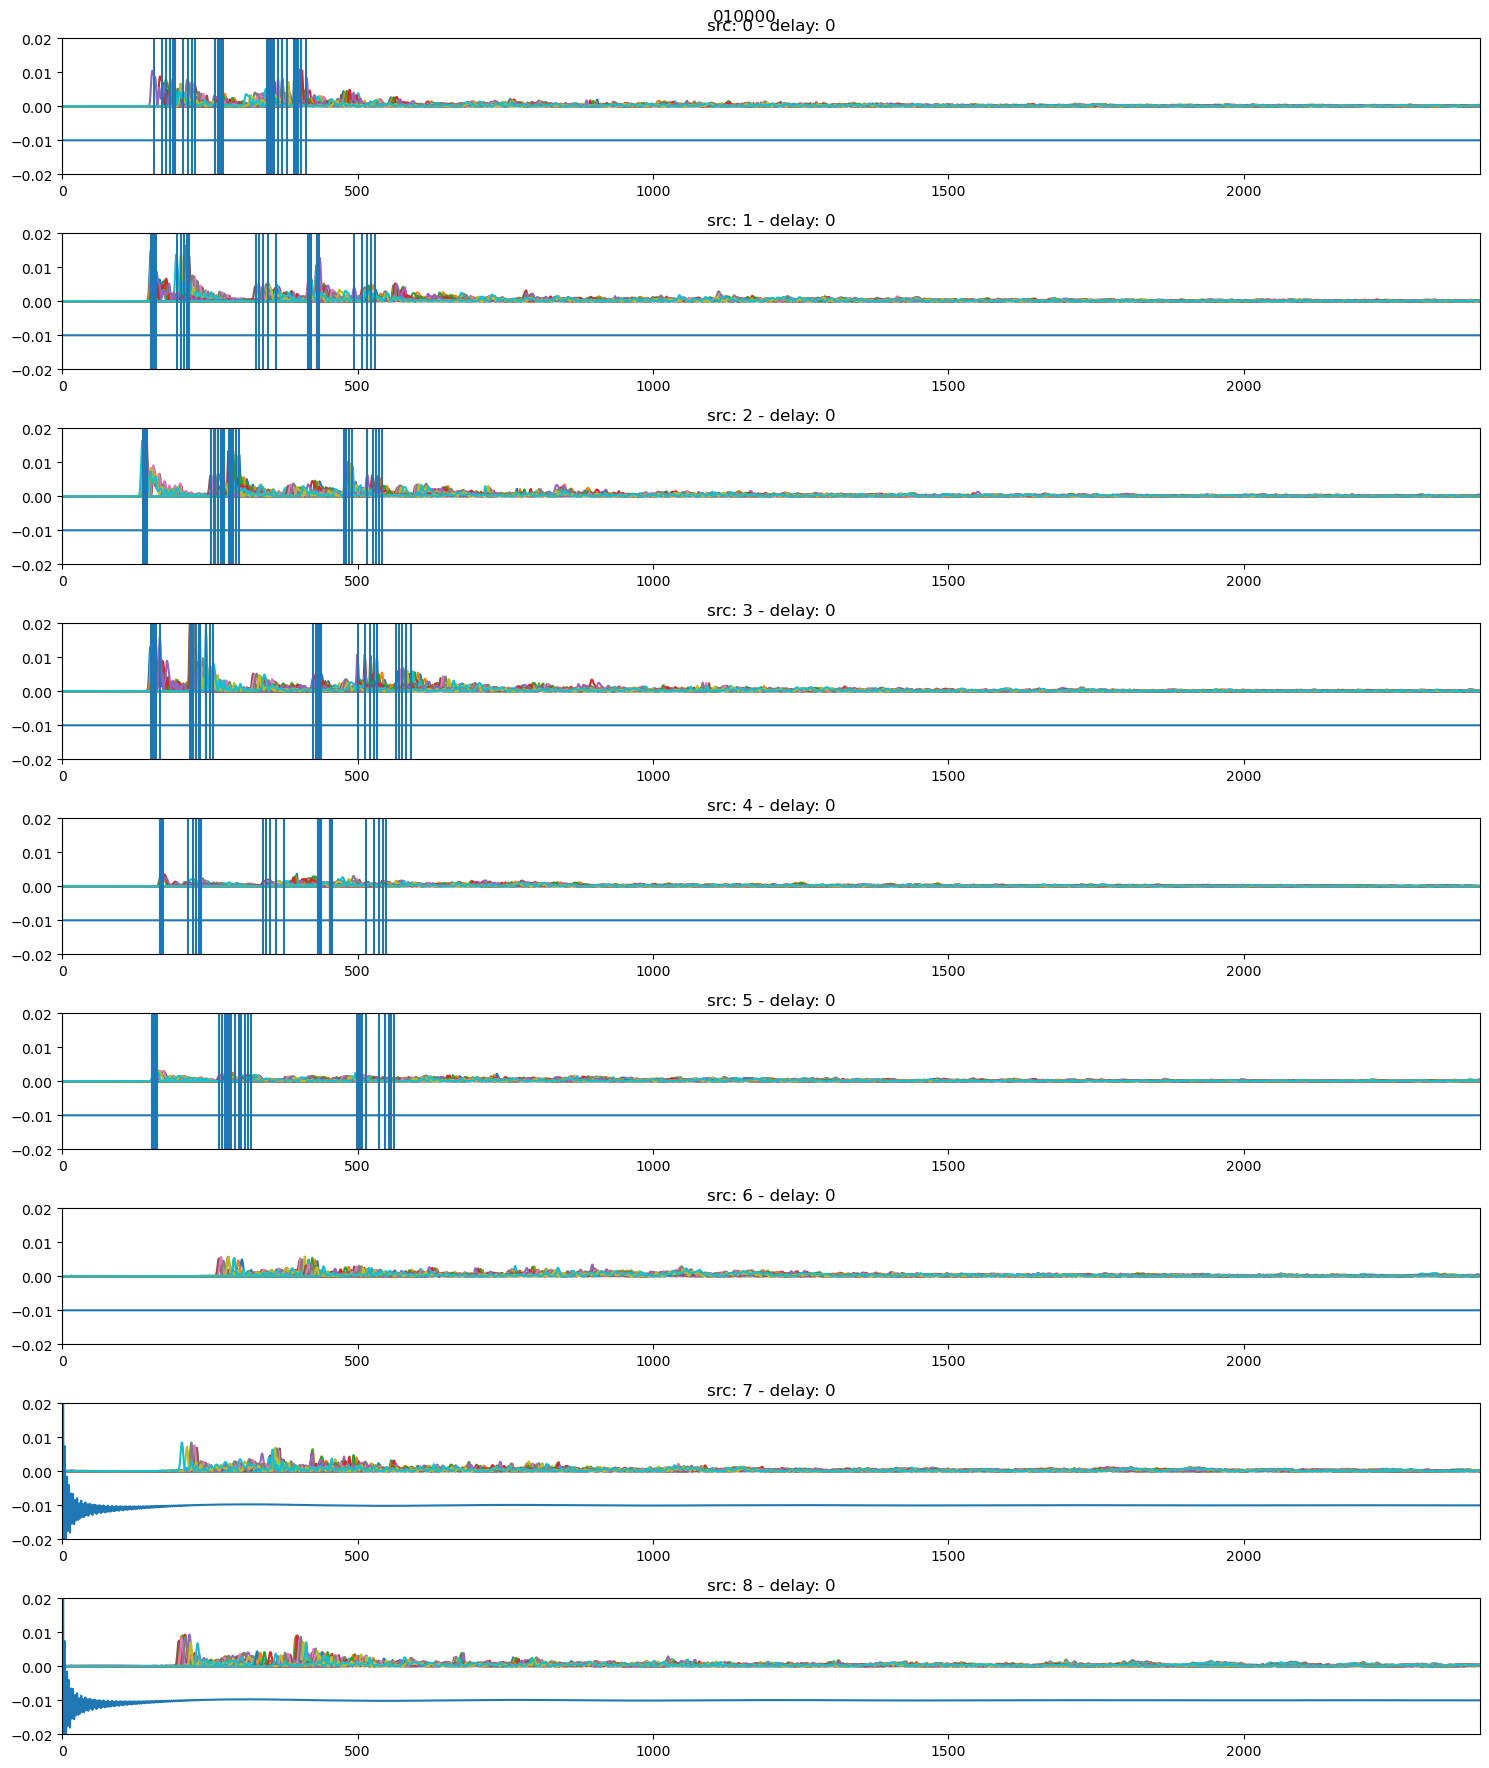

/rir/011000/0
/rir/011000/1
/rir/011000/2
/rir/011000/3
/rir/011000/4
/rir/011000/5
/rir/011000/6
/rir/011000/7
/rir/011000/8


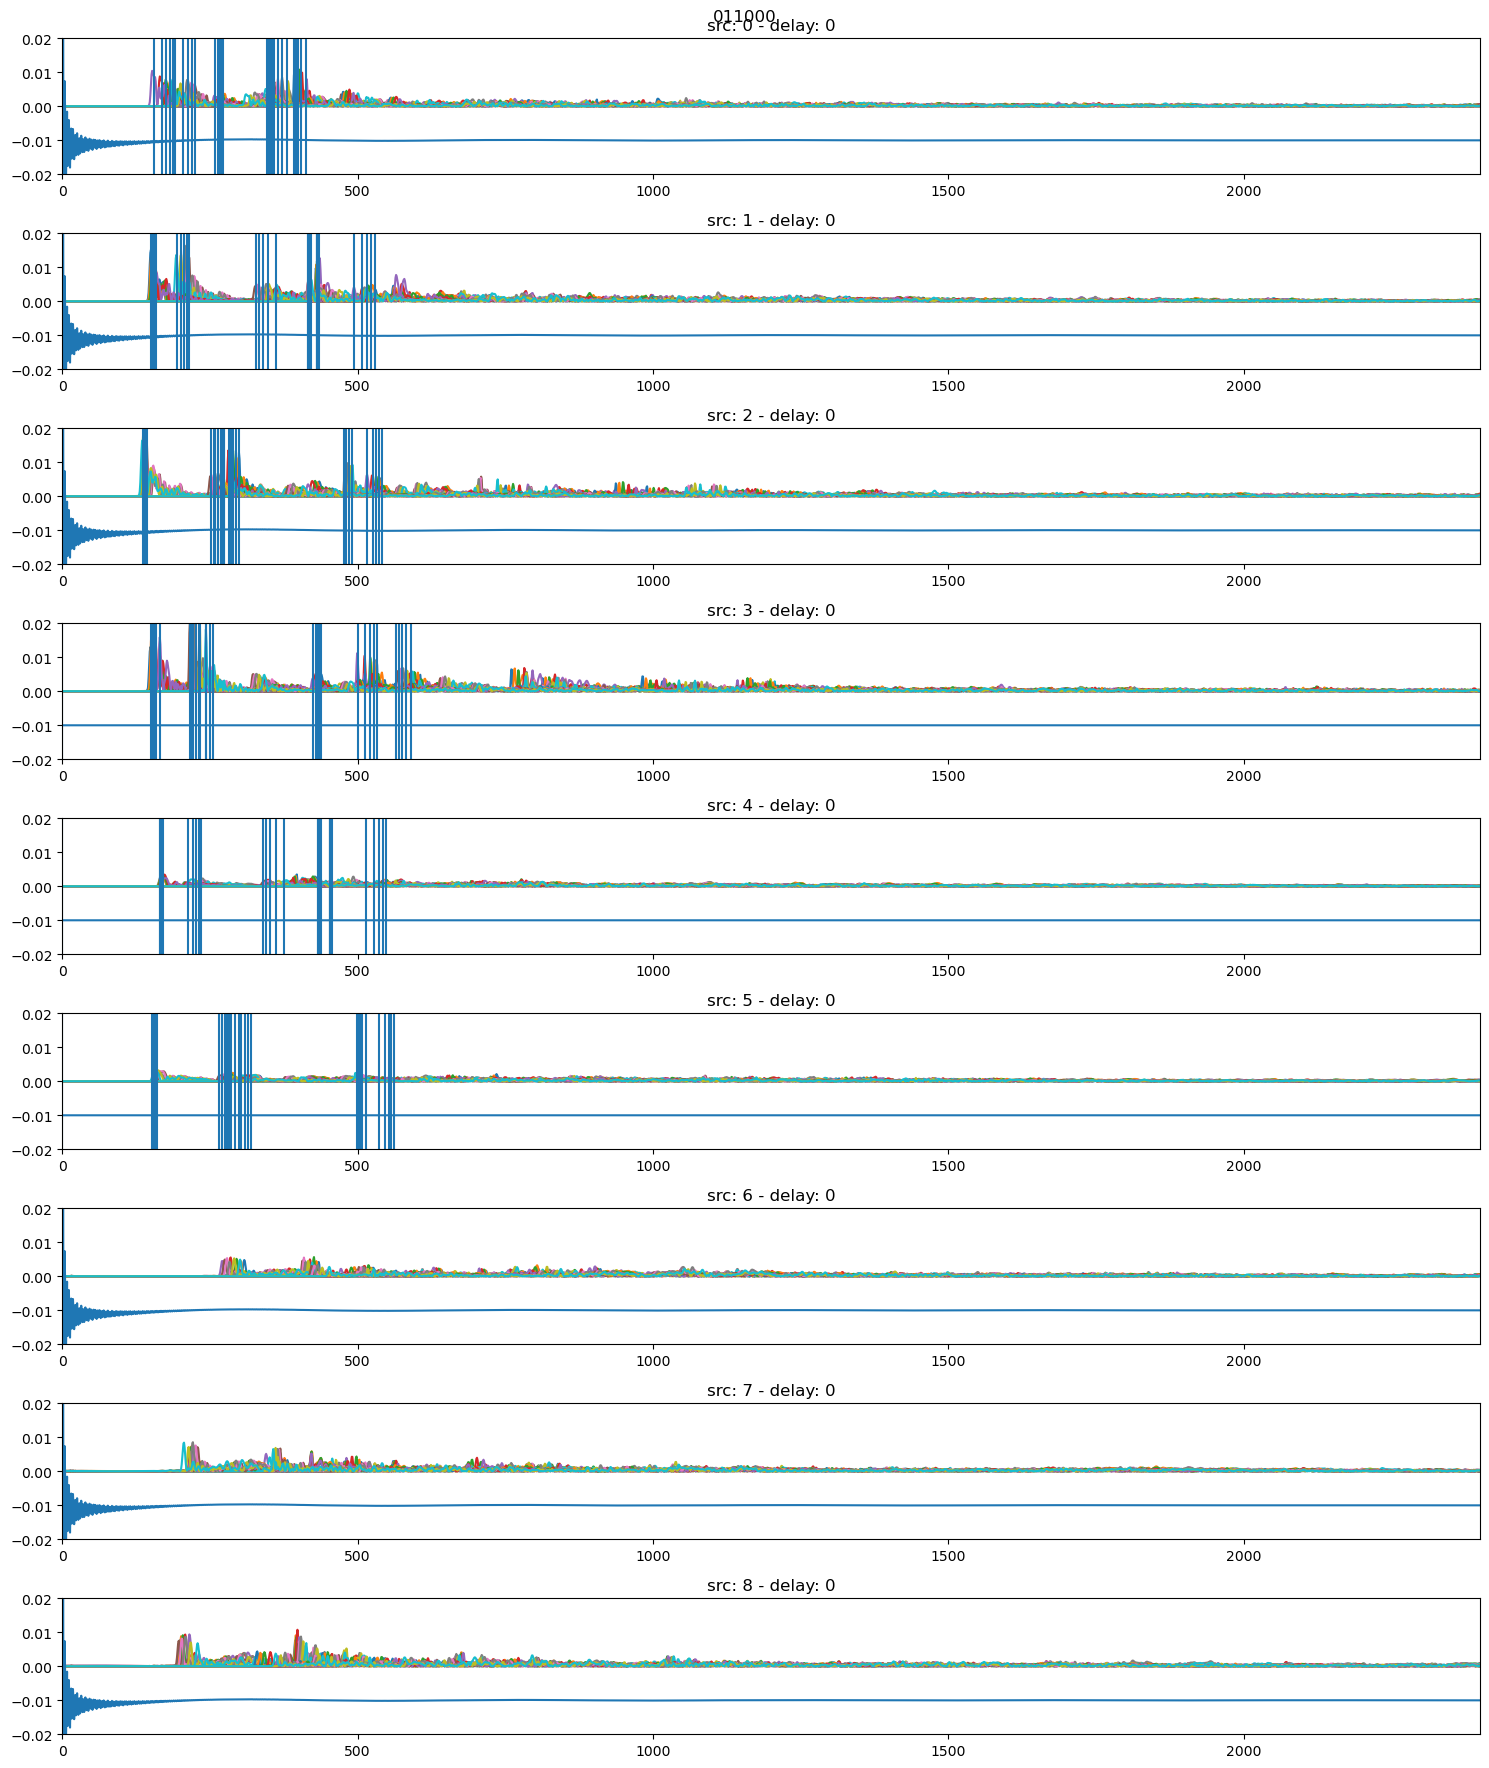

/rir/011100/0
/rir/011100/1
/rir/011100/2
/rir/011100/3
/rir/011100/4
/rir/011100/5
/rir/011100/6
/rir/011100/7
/rir/011100/8


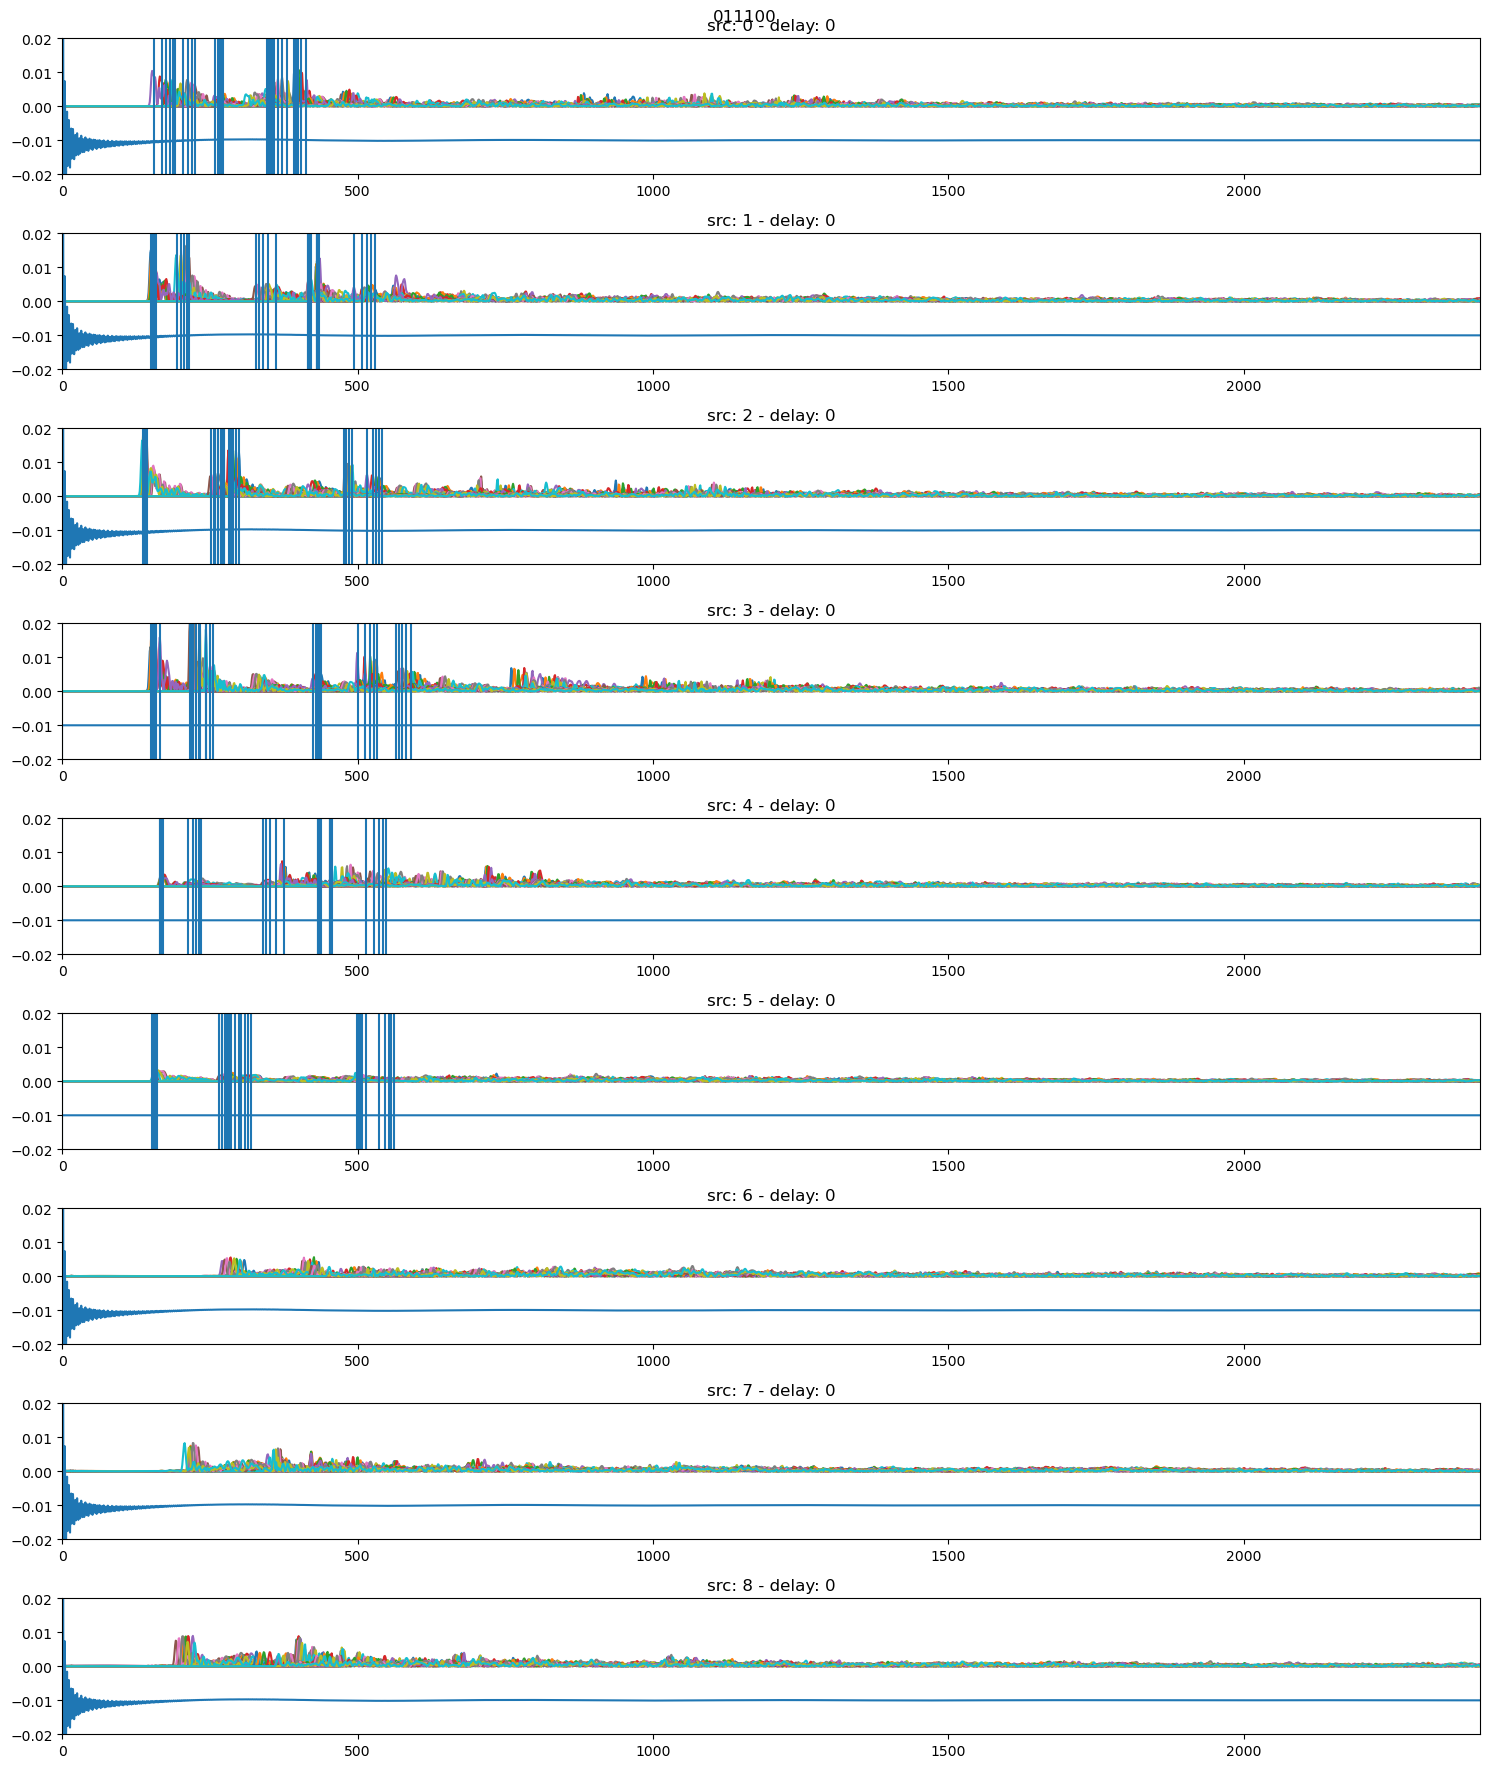

/rir/011110/0
/rir/011110/1
/rir/011110/2
/rir/011110/3
/rir/011110/4
/rir/011110/5
/rir/011110/6
/rir/011110/7
/rir/011110/8


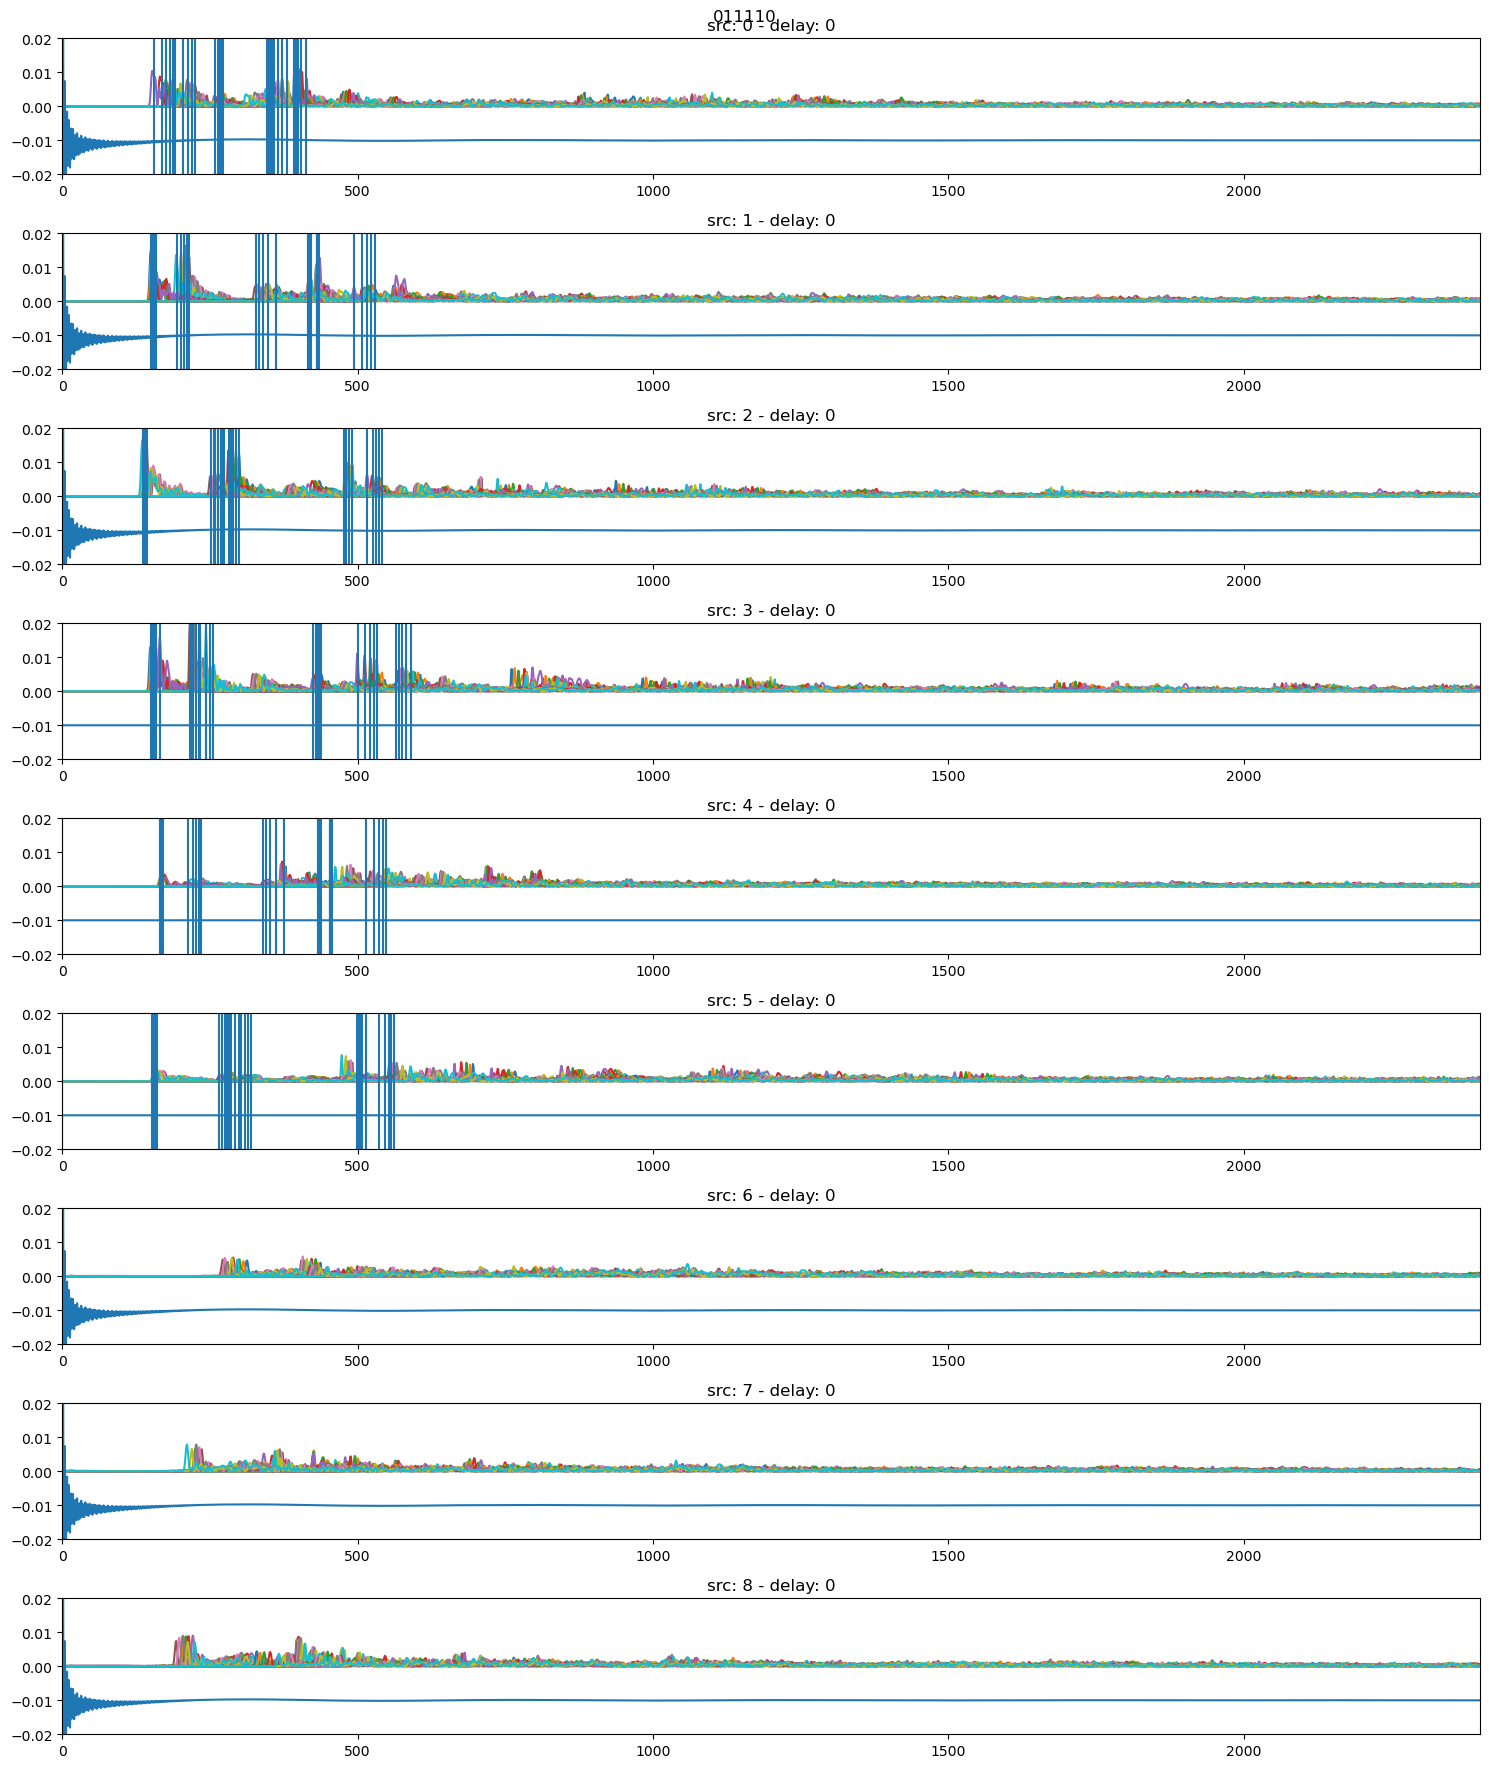

/rir/011111/0
/rir/011111/1
/rir/011111/2
/rir/011111/3
/rir/011111/4
/rir/011111/5
/rir/011111/6
/rir/011111/7
/rir/011111/8


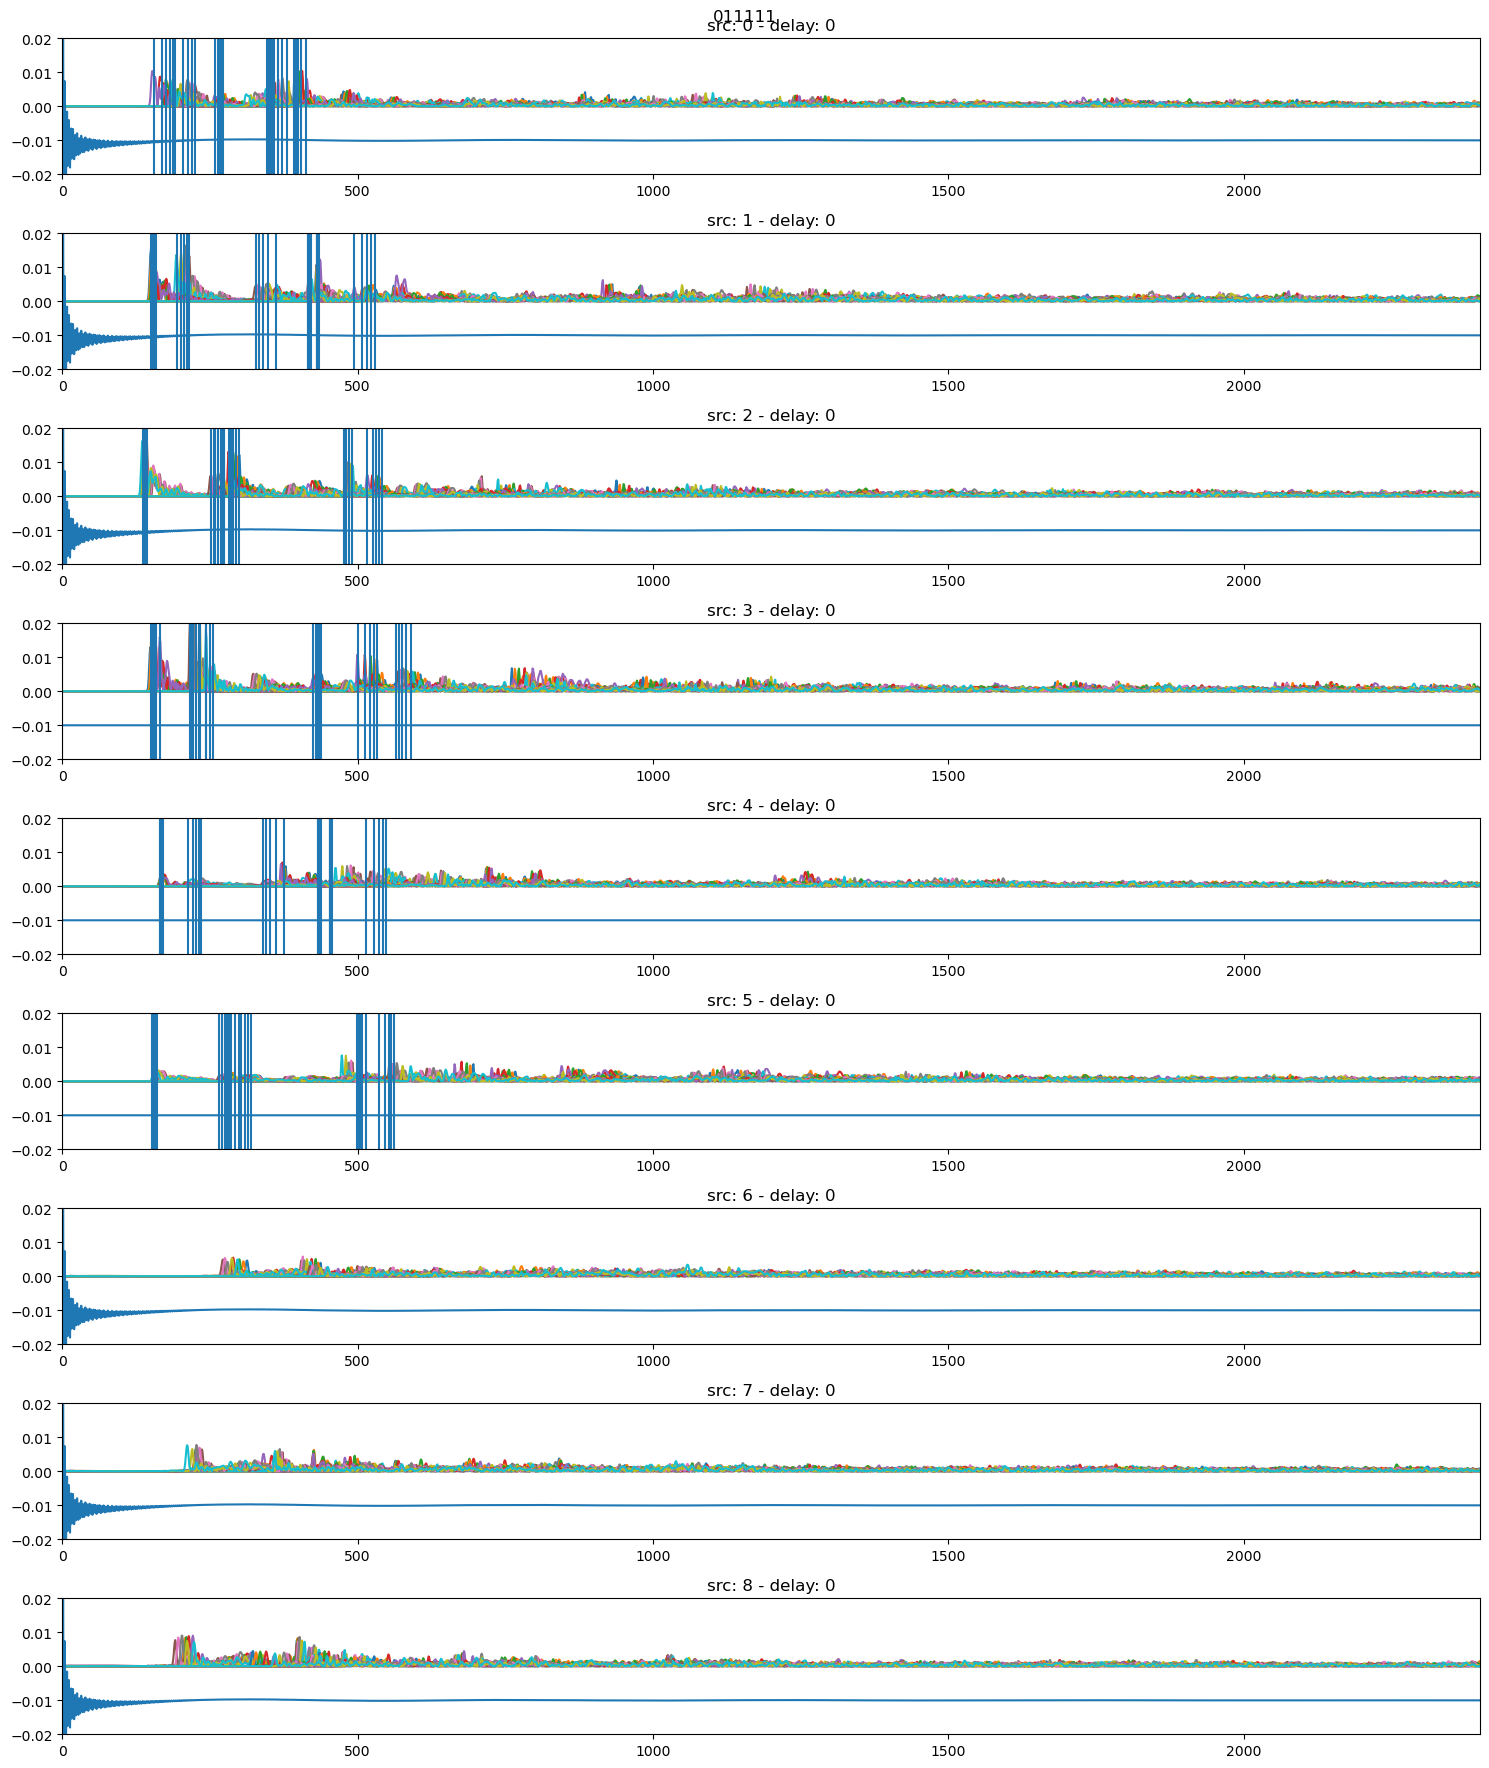

/rir/020002/0
/rir/020002/1
/rir/020002/2
/rir/020002/3
/rir/020002/4
/rir/020002/5
/rir/020002/6
/rir/020002/7
/rir/020002/8


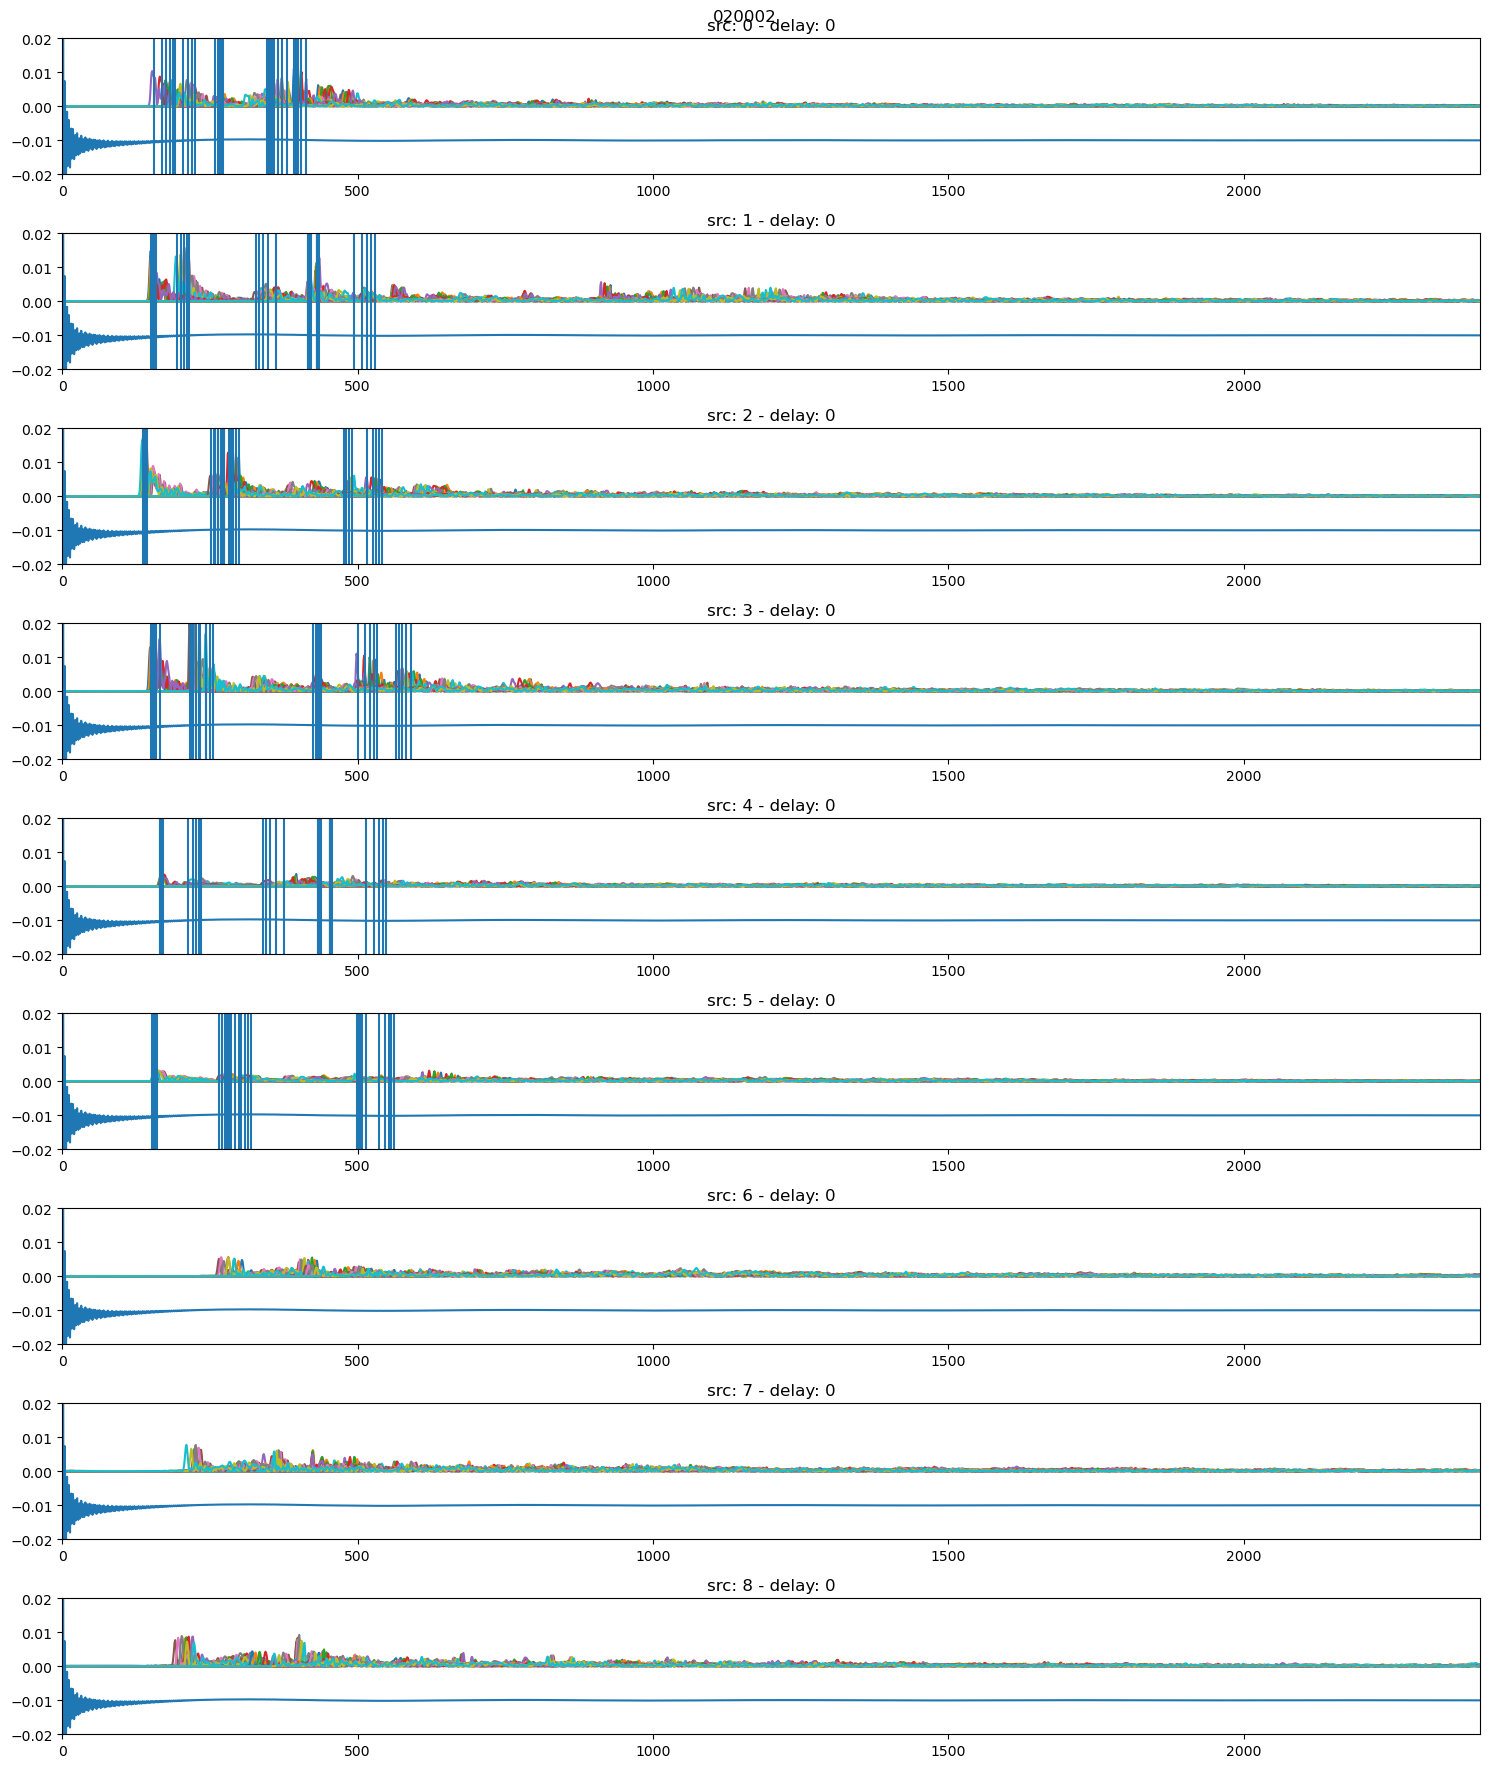

In [36]:
Fs = 48000
L = 0.5*Fs
for room in rooms:

    srcs = list(rir_dset['rir'][room])

    fig, axarr = plt.subplots(len(srcs), 1, figsize=(15,18))
    plt.suptitle(room)

    for s, src in enumerate(srcs):

        group = f'/rir/{room}/{src}'
        print(group)
        rirs = np.asarray(rir_dset[group])
    
        d = 4444
        
#         if group in list(offset_insights.keys()):
#                 d = offset_insights[group]
        
        d = d - 4444

            
        axarr[s].set_title(f'src: {src} - delay: {d}')
        axarr[s].plot(np.abs(rirs[:,:-1]))
        axarr[s].plot(rirs[:,-1]-0.01)
        if s < 6:
            for m in range(30):
                axarr[s].axvline(x=fs * echo["toa"][0,m,s])    
        # axarr[s].scatter(fs * echo["toa"][0,:,s], echo["amp"][0,:,s])
        axarr[s].axvline(x=d)
        axarr[s].set_ylim([-0.02, 0.02])
        axarr[s].set_xlim([0, 0.1*L])

    plt.tight_layout()
    plt.show()